In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr

In [3]:
df = pd.read_csv("training.csv", delimiter=',')

IOError: File training.csv does not exist

In [ ]:
#Scrivere a cosa si riferiscono le variabili
df.head()

In [ ]:
df2 = df[df["Make"]=="KIA"]
df2 = df2[df2["Model"]=="SPECTRA"]
df2 = df2[df2["SubModel"]=="4D SEDAN EX"]

df2[['RefId','IsBadBuy','VehYear','VehicleAge','Make','Model','SubModel','VehOdo','PurchDate','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice','VehBCost']]

In [ ]:
df.dtypes

In [4]:
df.describe()

NameError: name 'df' is not defined

In [29]:
df.corr()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
RefId,1.000000,-0.058917,0.087005,-0.136419,0.022189,-0.046968,0.081927,0.081251,0.005411,0.006895,0.094436,0.093831,0.025660,0.029618,-0.032782,0.712117,0.052257,-0.088285,-0.017651
IsBadBuy,-0.058917,1.000000,-0.140805,0.152069,-0.011643,0.049100,-0.116347,-0.114127,-0.089290,-0.089309,-0.123151,-0.120812,-0.112496,-0.113069,0.004729,-0.065446,-0.118423,0.008915,0.066842
VehYear,0.087005,-0.140805,1.000000,-0.956413,0.200205,-0.125991,0.601509,0.568213,0.596729,0.566206,0.611392,0.584125,0.608913,0.580166,0.018561,0.020544,0.385799,0.140237,-0.194767
VehicleAge,-0.136419,0.152069,-0.956413,1.000000,-0.218855,0.178204,-0.586476,-0.554756,-0.478138,-0.455792,-0.596844,-0.569319,-0.520099,-0.497416,0.009997,-0.098151,-0.351737,-0.101736,0.191328
WheelTypeID,0.022189,-0.011643,0.200205,-0.218855,1.000000,-0.205021,-0.114883,-0.137920,-0.126472,-0.146556,-0.102249,-0.125627,-0.124170,-0.141518,0.010137,0.036805,-0.174199,0.028566,-0.163193
VehOdo,-0.046968,0.049100,-0.125991,0.178204,-0.205021,1.000000,0.070888,0.088068,0.130316,0.142008,0.060168,0.077008,0.117720,0.129434,0.009688,-0.055387,-0.007124,-0.005880,0.402231
MMRAcquisitionAuctionAveragePrice,0.081927,-0.116347,0.601509,-0.586476,-0.114883,0.070888,1.000000,0.991998,0.911158,0.912530,0.939707,0.935734,0.878655,0.877418,0.028167,0.042776,0.795426,0.054969,0.001598
MMRAcquisitionAuctionCleanPrice,0.081251,-0.114127,0.568213,-0.554756,-0.137920,0.088068,0.991998,1.000000,0.904678,0.919137,0.929087,0.934977,0.872686,0.879606,0.032612,0.040791,0.786633,0.049126,0.020755
MMRAcquisitionRetailAveragePrice,0.005411,-0.089290,0.596729,-0.478138,-0.126472,0.130316,0.911158,0.904678,1.000000,0.990654,0.856885,0.855553,0.915954,0.908002,0.052286,-0.063901,0.754192,0.107583,0.006129
MMRAcquisitonRetailCleanPrice,0.006895,-0.089309,0.566206,-0.455792,-0.146556,0.142008,0.912530,0.919137,0.990654,1.000000,0.855041,0.861568,0.910469,0.911113,0.053924,-0.059167,0.753401,0.097319,0.026233


In [1]:
pd.scatter_matrix(df[['IsBadBuy','VehicleAge','VehOdo','WarrantyCost']], alpha=0.2, figsize=(10, 10), diagonal='kde')

NameError: name 'pd' is not defined

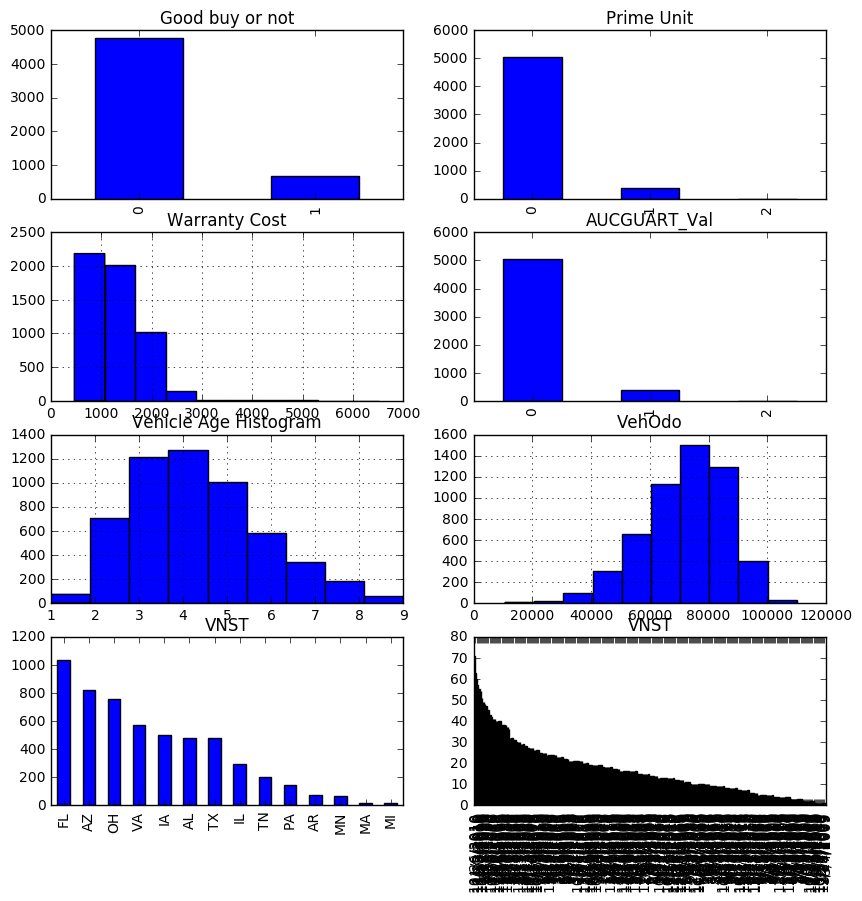

In [31]:
data = sorted(df['PRIMEUNIT'].unique())
prime_mapping = dict(zip(data, range(0, len(data) + 1)))
df['PRIMEUNIT_Val'] = df['PRIMEUNIT'].map(prime_mapping).astype(int)

data = sorted(df['AUCGUART'].unique())
aucguart_mapping = dict(zip(data, range(0, len(data) + 1)))
df['AUCGUART_Val'] = df['AUCGUART'].map(aucguart_mapping).astype(int)

data = sorted(df['PurchDate'].unique())
purchdate_mapping = dict(zip(data, range(0, len(data) + 1)))
df['PurchDate_Val'] = df['PurchDate'].map(purchdate_mapping).astype(int)

fig = plt.figure(figsize=(10, 10))
fig_dims = (4, 2)

plt.subplot2grid(fig_dims, (0, 0))
df['IsBadBuy'].value_counts().plot(kind='bar', title='Good buy or not')

plt.subplot2grid(fig_dims, (0, 1))
df['PRIMEUNIT_Val'].value_counts().plot(kind='bar', title='Prime Unit')

plt.subplot2grid(fig_dims, (1, 0))
df['WarrantyCost'].hist()
plt.title('Warranty Cost')

plt.subplot2grid(fig_dims, (1, 1))
df['AUCGUART_Val'].value_counts().plot(kind='bar', title='AUCGUART_Val')

plt.subplot2grid(fig_dims, (2, 0))
df['VehicleAge'].hist(bins=9)
plt.title('Vehicle Age Histogram')

plt.subplot2grid(fig_dims, (2, 1))
df['VehOdo'].hist()
plt.title('VehOdo')

plt.subplot2grid(fig_dims, (3, 0))
df['VNST'].value_counts().plot(kind='bar', title='VNST')

plt.subplot2grid(fig_dims, (3, 1))
df['PurchDate'].value_counts().plot(kind='bar', title='VNST')

In [32]:
pclass_xt = pd.crosstab(df['VehicleAge'], df['IsBadBuy'])
pclass_xt

IsBadBuy,0,1
VehicleAge,,
1,66,6
2,665,45
3,1103,110
4,1149,124
5,864,138
6,480,106
7,259,82
8,138,42
9,41,14


In [33]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

IsBadBuy,0,1
VehicleAge,,
1,0.916667,0.083333
2,0.936620,0.063380
3,0.909316,0.090684
4,0.902592,0.097408
5,0.862275,0.137725
6,0.819113,0.180887
7,0.759531,0.240469
8,0.766667,0.233333
9,0.745455,0.254545


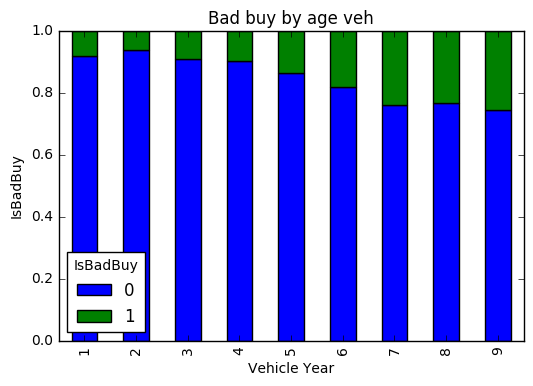

In [34]:
pclass_xt_pct.plot(kind='bar', stacked=True, title='Bad buy by age veh')
plt.xlabel('Vehicle Year')
plt.ylabel('IsBadBuy')

{'VOLVO': 27, 'SATURN': 21, 'DODGE': 4, 'SCION': 22, 'ISUZU': 10, 'JEEP': 11, 'HONDA': 7, 'HYUNDAI': 8, 'MAZDA': 14, 'CHEVROLET': 2, 'SUZUKI': 24, 'VOLKSWAGEN': 26, 'MERCURY': 15, 'MINI': 16, 'LINCOLN': 13, 'CHRYSLER': 3, 'GMC': 6, 'CADILLAC': 1, 'FORD': 5, 'SUBARU': 23, 'INFINITI': 9, 'MITSUBISHI': 17, 'PONTIAC': 20, 'NISSAN': 18, 'TOYOTA': 25, 'OLDSMOBILE': 19, 'BUICK': 0, 'KIA': 12}


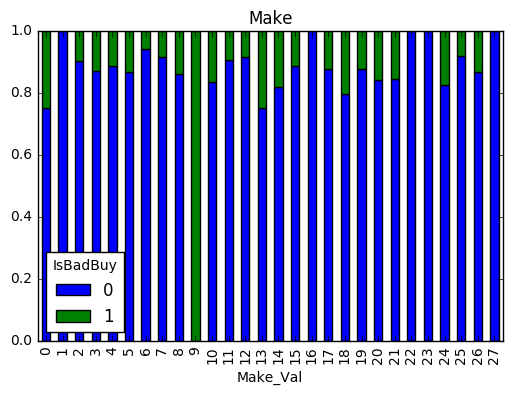

In [35]:
makes = sorted(df['Make'].unique())
make_mapping = dict(zip(makes, range(0, len(makes) + 1)))
df['Make_Val'] = df['Make'].map(make_mapping).astype(int)

print(make_mapping)

make_val_xt = pd.crosstab(df['Make_Val'], df['IsBadBuy'])
make_val_xt_pct = make_val_xt.div(make_val_xt.sum(1).astype(float), axis=0)
make_val_xt_pct.plot(kind='bar', stacked=True, title='Make')

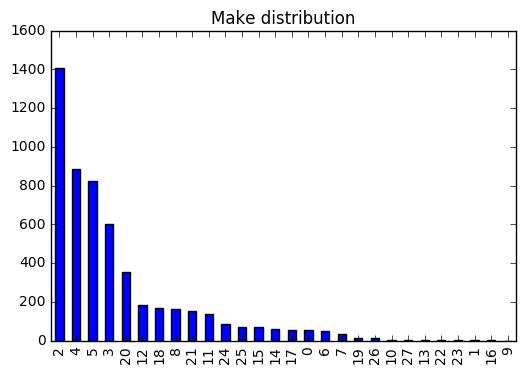

In [36]:
df['Make_Val'].value_counts().plot(kind='bar', title='Make distribution')

{'COMPACT': 0, 'LARGE SUV': 3, 'MEDIUM': 5, 'VAN': 11, 'SPECIALTY': 9, 'CROSSOVER': 1, 'LARGE': 2, 'MEDIUM SUV': 6, 'SMALL TRUCK': 8, 'SPORTS': 10, 'SMALL SUV': 7, 'LARGE TRUCK': 4}


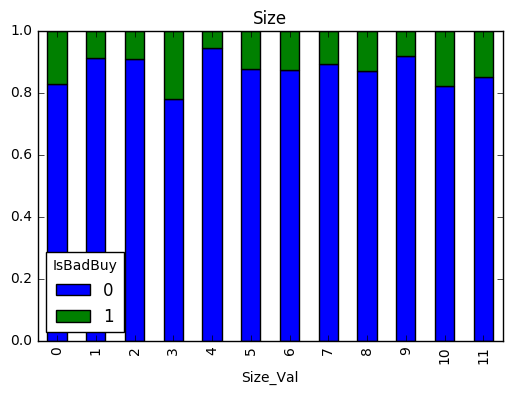

In [37]:
sizes = sorted(df['Size'].unique())
size_mapping = dict(zip(sizes, range(0, len(sizes) + 1)))
df['Size_Val'] = df['Size'].map(size_mapping).astype(int)

print(size_mapping)

size_val_xt = pd.crosstab(df['Size_Val'], df['IsBadBuy'])
size_val_xt_pct = size_val_xt.div(size_val_xt.sum(1).astype(float), axis=0)
size_val_xt_pct.plot(kind='bar', stacked=True, title='Size')

{'OTHER': 2, 'MANHEIM': 1, 'ADESA': 0}


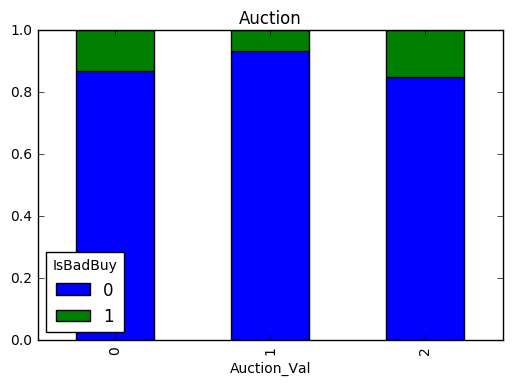

In [38]:
auctions = sorted(df['Auction'].unique())
auction_mapping = dict(zip(auctions, range(0, len(auctions) + 1)))
df['Auction_Val'] = df['Auction'].map(auction_mapping).astype(int)

print(auction_mapping)

size_val_xt = pd.crosstab(df['Auction_Val'], df['IsBadBuy'])
size_val_xt_pct = size_val_xt.div(size_val_xt.sum(1).astype(float), axis=0)
size_val_xt_pct.plot(kind='bar', stacked=True, title='Auction')

{'AMERICAN': 0, 'OTHER': 1, 'OTHER ASIAN': 2, 'TOP LINE ASIAN': 3}


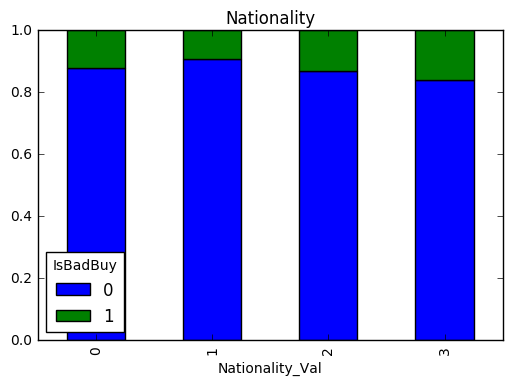

In [39]:
nationalities = sorted(df['Nationality'].unique())
nationality_mapping = dict(zip(nationalities, range(0, len(nationalities) + 1)))
df['Nationality_Val'] = df['Nationality'].map(nationality_mapping).astype(int)

print(nationality_mapping)

size_val_xt = pd.crosstab(df['Nationality_Val'], df['IsBadBuy'])
size_val_xt_pct = size_val_xt.div(size_val_xt.sum(1).astype(float), axis=0)
size_val_xt_pct.plot(kind='bar', stacked=True, title='Nationality')

{'GM': 2, 'OTHER': 3, 'CHRYSLER': 0, 'FORD': 1}


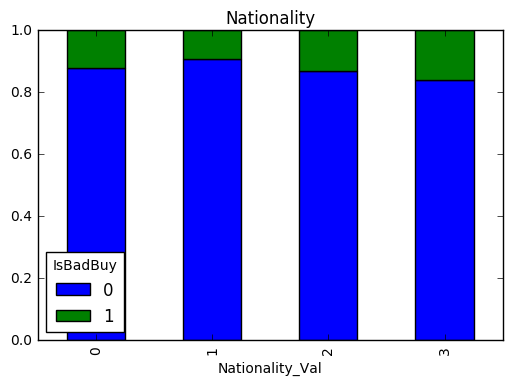

In [40]:
topthree = sorted(df['TopThreeAmericanName'].unique())
topthree_mapping = dict(zip(topthree, range(0, len(topthree) + 1)))
df['TopThreeAmericanName_Val'] = df['TopThreeAmericanName'].map(topthree_mapping).astype(int)

print(topthree_mapping)

size_val_xt = pd.crosstab(df['Nationality_Val'], df['IsBadBuy'])
size_val_xt_pct = size_val_xt.div(size_val_xt.sum(1).astype(float), axis=0)
size_val_xt_pct.plot(kind='bar', stacked=True, title='Nationality')

{nan: 0, 'Alloy': 1, 'Special': 3, 'Covers': 2}


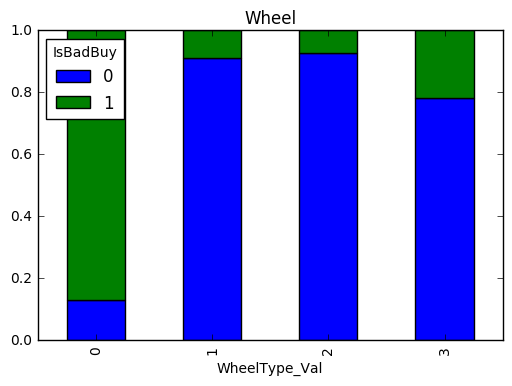

In [41]:
wheel = sorted(df['WheelType'].unique())
wheel_mapping = dict(zip(wheel, range(0, len(wheel) + 1)))
df['WheelType_Val'] = df['WheelType'].map(wheel_mapping).astype(int)

print(wheel_mapping)

size_val_xt = pd.crosstab(df['WheelType_Val'], df['IsBadBuy'])
size_val_xt_pct = size_val_xt.div(size_val_xt.sum(1).astype(float), axis=0)
size_val_xt_pct.plot(kind='bar', stacked=True, title='Wheel')

{'AUTO': 0, 'MANUAL': 1}


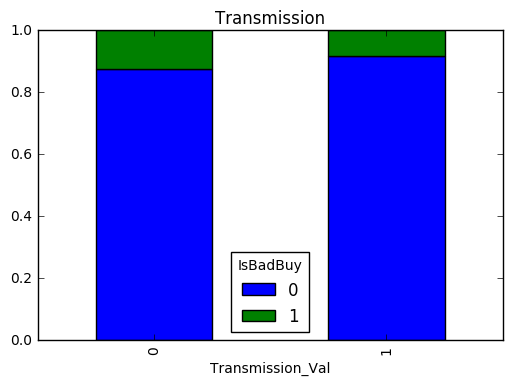

In [42]:
transmissions = sorted(df['Transmission'].unique())
transmission_mapping = dict(zip(transmissions, range(0, len(transmissions) + 1)))
df['Transmission_Val'] = df['Transmission'].map(transmission_mapping).astype(int)

print(transmission_mapping)

size_val_xt = pd.crosstab(df['Transmission_Val'], df['IsBadBuy'])
size_val_xt_pct = size_val_xt.div(size_val_xt.sum(1).astype(float), axis=0)
size_val_xt_pct.plot(kind='bar', stacked=True, title='Transmission')

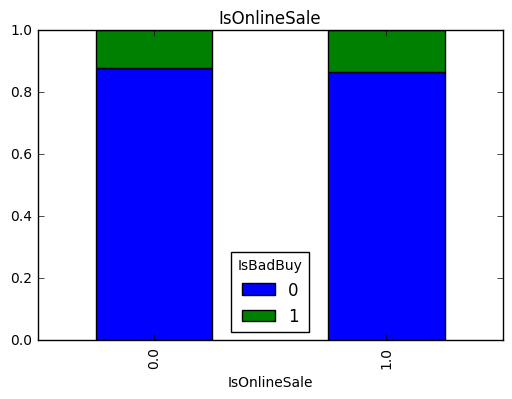

In [43]:
size_val_xt = pd.crosstab(df['IsOnlineSale'], df['IsBadBuy'])
size_val_xt_pct = size_val_xt.div(size_val_xt.sum(1).astype(float), axis=0)
size_val_xt_pct.plot(kind='bar', stacked=True, title='IsOnlineSale')

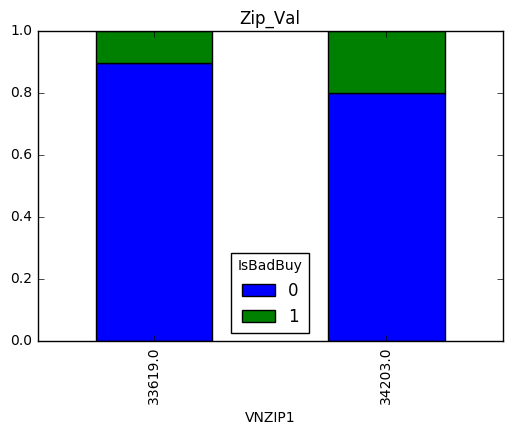

In [44]:
df2 = df[df["VNST"]=="FL"]

size_val_xt = pd.crosstab(df2['VNZIP1'], df2['IsBadBuy'])
size_val_xt_pct = size_val_xt.div(size_val_xt.sum(1).astype(float), axis=0)
size_val_xt_pct.plot(kind='bar', stacked=True, title='Zip_Val')

In [4]:
df2 = df[df["IsBadBuy"]==1]
pclass_xt = pd.crosstab(df2['Make'], df2['IsBadBuy'])
pclass_xt

IsBadBuy,1
Make,
BUICK,14
CHEVROLET,138
CHRYSLER,78
DODGE,101
FORD,109
GMC,3
HONDA,3
HYUNDAI,23
INFINITI,1
